In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [51]:
!pip install category-encoders

### read data

In [52]:
data = pd.read_csv('house prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### preprocess

#### fill null, define relative columns

In [54]:
print(data.isnull().sum()[data.isnull().sum()>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


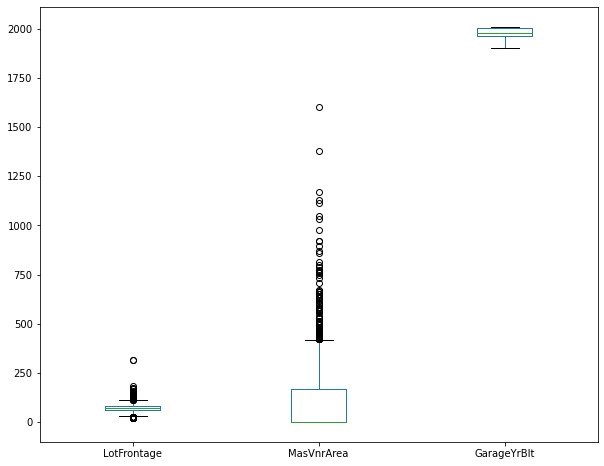

In [55]:
inds = list(data.isnull().sum()[data.isnull().sum()>0].index)
data[inds].plot(kind='box', figsize= (10,8))

- lotFrontage and MasVnrArea have outlier. they are numerical and have null. we use median to fill null. 

- GarageYrBlt is numerical. we use mean for filling nulls.

- Dropping of column having more number of null values is to be done only when column deleted doesn't effect our analysis or that column is out of scope for our model

- columns consists of more than 70 percent which meets our limit criteria(70%) and doesn't effect our analysis. So that columns has been dropped.

In [56]:
data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [57]:
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

In [58]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)

MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual and GarageCond are categirical. we use mode to fill null.

In [59]:
name_mode = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
             'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
             'GarageQual', 'GarageCond']

for name in name_mode:
  data[name].fillna(data[name].mode()[0], inplace=True)

all nulls are filled.

In [60]:
print(data.isnull().sum()[data.isnull().sum()>0])

Series([], dtype: int64)


'Id' doesn't effect our analysis.

In [61]:
data.drop(columns=['Id'], axis=1, inplace=True)

#### remove outliers and encode Categorical Data

some column has lot of outlier. clip them? which one? it depends on problem. outliers affect overall price. we can not remove them.

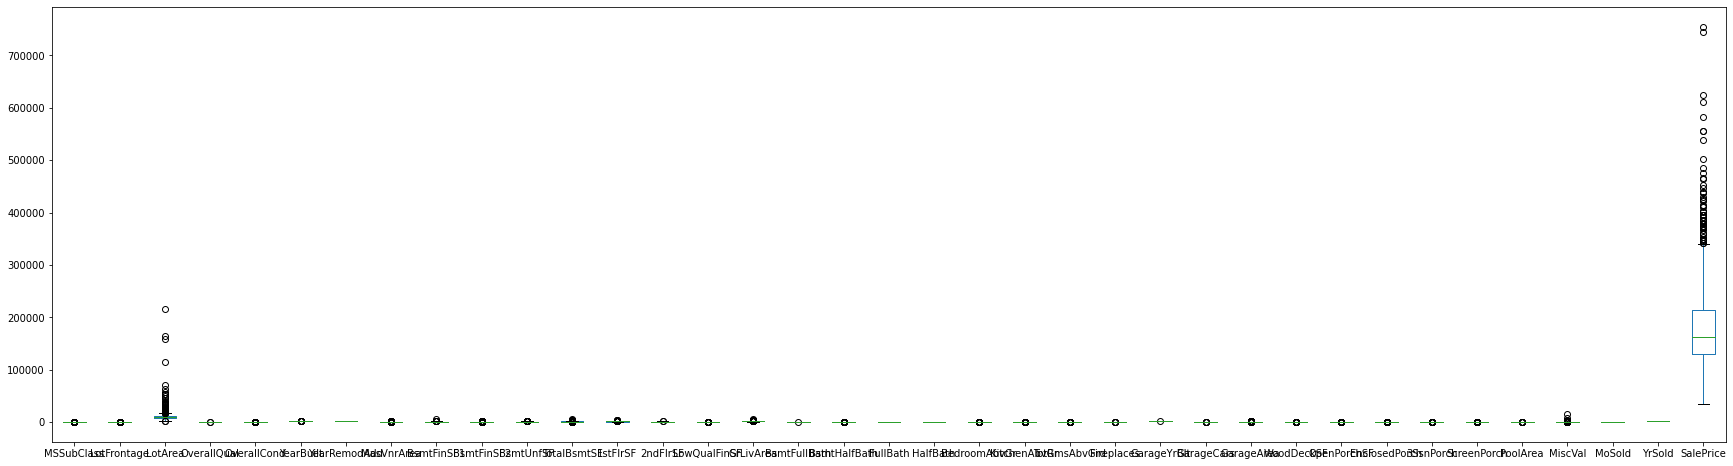

In [62]:
data.plot(kind='box', figsize= (30,8))

- convert ordinal columns to number with ordinal encoder.
- convert nominal columns to number with one hot.

In [63]:
nominals = ['MSZoning', 'Street', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
            'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

In [64]:
data= pd.get_dummies(data, columns=nominals, drop_first= True)

other columns are ordinal

In [65]:
import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['LotShape'],return_df=True,
                           mapping=[{'col':'LotShape',
'mapping':{'IR3':0,'IR2':1,'IR1':2,'Reg':3}}])

data = encoder.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [66]:
encoder= ce.OrdinalEncoder(cols=['LandContour'],return_df=True,
                           mapping=[{'col':'LandContour',
'mapping':{'Low':0,'HLS':1,'Bnk':2,'Lvl':3}}])

data = encoder.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [67]:
encoder= ce.OrdinalEncoder(cols=['LandSlope'],return_df=True,
                           mapping=[{'col':'LandSlope',
'mapping':{'Gtl':0,'Mod':1,'Sev':2}}])

data = encoder.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [68]:
encoder= ce.OrdinalEncoder(cols=['ExterQual'],return_df=True,
                           mapping=[{'col':'ExterQual',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])

data = encoder.fit_transform(data)

# ExterQual: Evaluates the quality of the material on the exterior 
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
		
encoder= ce.OrdinalEncoder(cols=['ExterCond'],return_df=True,
                           mapping=[{'col':'ExterCond',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])

data = encoder.fit_transform(data)

# ExterCond: Evaluates the present condition of the material on the exterior
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

encoder= ce.OrdinalEncoder(cols=['BsmtQual'],return_df=True,
                           mapping=[{'col':'BsmtQual',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}}])

data = encoder.fit_transform(data)
		
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement

encoder= ce.OrdinalEncoder(cols=['BsmtCond'],return_df=True,
                           mapping=[{'col':'BsmtCond',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}}])

data = encoder.fit_transform(data)

# BsmtCond: Evaluates the general condition of the basement

#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement

encoder= ce.OrdinalEncoder(cols=['BsmtExposure'],return_df=True,
                           mapping=[{'col':'BsmtExposure',
'mapping':{'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}}])

data = encoder.fit_transform(data)

# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement


encoder= ce.OrdinalEncoder(cols=['BsmtFinType1'],return_df=True,
                           mapping=[{'col':'BsmtFinType1',
'mapping':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6}}])

data = encoder.fit_transform(data)

# BsmtFinType1: Rating of basement finished area

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [69]:
encoder= ce.OrdinalEncoder(cols=['BsmtFinType2'],return_df=True,
                           mapping=[{'col':'BsmtFinType2',
'mapping':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6}}])

data = encoder.fit_transform(data)

# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [70]:
encoder= ce.OrdinalEncoder(cols=['HeatingQC'],return_df=True,
                           mapping=[{'col':'HeatingQC',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])

data = encoder.fit_transform(data)

# HeatingQC: Heating quality and condition

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
		

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [71]:
encoder= ce.OrdinalEncoder(cols=['KitchenQual'],return_df=True,
                           mapping=[{'col':'KitchenQual',
'mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}}])

data = encoder.fit_transform(data)

# KitchenQual: Kitchen quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [72]:
encoder= ce.OrdinalEncoder(cols=['Functional'],return_df=True,
                           mapping=[{'col':'Functional',
'mapping':{'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}}])

data = encoder.fit_transform(data)

# Functional: Home functionality (Assume typical unless deductions are warranted)

#        Typ	Typical Functionality
#        Min1	Minor Deductions 1
#        Min2	Minor Deductions 2
#        Mod	Moderate Deductions
#        Maj1	Major Deductions 1
#        Maj2	Major Deductions 2
#        Sev	Severely Damaged
#        Sal	Salvage only

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [73]:
encoder= ce.OrdinalEncoder(cols=['FireplaceQu'],return_df=True,
                           mapping=[{'col':'FireplaceQu',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}}])

data = encoder.fit_transform(data)

# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace
		

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [74]:
encoder= ce.OrdinalEncoder(cols=['GarageFinish'],return_df=True,
                           mapping=[{'col':'GarageFinish',
'mapping':{'NA':0,'Unf':1,'RFn':2,'Fin':3}}])

data = encoder.fit_transform(data)

# GarageFinish: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [75]:
encoder= ce.OrdinalEncoder(cols=['GarageQual'],return_df=True,
                           mapping=[{'col':'GarageQual',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}}])

data = encoder.fit_transform(data)

# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

encoder= ce.OrdinalEncoder(cols=['GarageCond'],return_df=True,
                           mapping=[{'col':'GarageCond',
'mapping':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5}}])

data = encoder.fit_transform(data)

# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

encoder= ce.OrdinalEncoder(cols=['PavedDrive'],return_df=True,
                           mapping=[{'col':'PavedDrive',
'mapping':{'N':0,'P':1,'Y':2}}])

data = encoder.fit_transform(data)

# PavedDrive: Paved driveway

#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [76]:
data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,...,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,3,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,4,2003.0,2,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,3,0,6,8,1976,1976,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,3,1976.0,2,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,2,3,0,7,5,2001,2002,162.0,3,2,4,3,2,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,2001.0,2,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,2,3,0,7,5,1915,1970,0.0,2,2,3,4,1,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,1998.0,1,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,2,3,0,8,5,2000,2000,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,3,2000.0,2,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [77]:
data.to_csv('cleanQ1.csv', index=False)

In [78]:
y = data['SalePrice'].values.reshape(-1,1)
X = data.drop(columns=['SalePrice'], axis=1)

### split train test

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### StandardScaler

Feature Scaling is used to standardize the variables present in the data in a fixed range.

In [80]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [81]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### Regression

In [82]:
def plot_loss(history):
  # Plotting Metrics
  # Plot the Loss Curves
  # print(history.history.keys())
  fig = plt.figure()
  plt.plot(history.history['mse'],'r')
  plt.plot(history.history['val_mse'],'b')
  plt.title('model mse metric')
  plt.ylabel('mse')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.grid()
  plt.show()

  fig = plt.figure()
  plt.plot(history.history['mae'],'r')
  plt.plot(history.history['val_mae'],'b')
  plt.title('model mae metric')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.grid()
  plt.show()

In [83]:
def plot_pred_actual(pred, actual):
  plt.plot(actual, pred, 'o', label='pred(actual)')
  plt.title('predicted values ​​in terms of actual values')
  plt.ylabel('prediction')
  plt.xlabel('actual')
  plt.legend()
  plt.grid()
  plt.show()

In [84]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
from keras.optimizers import Adam

def create_model(loss_t, nl, active, lr):
  model = Sequential()
  model.add(Dense(64, activation=active, input_shape=(191,)))	#Hidden Layer 1
  for i in range(nl):
    model.add(Dense(64, activation=active))	#Hidden Layer 2, 3, ....
  model.add(Dense(1)) #Last layer with one output positive price
  model.summary()

  # Configure the Network
  opt = Adam(learning_rate=lr)
  model.compile(loss=loss_t, optimizer=opt, metrics=['mse', 'mae'])
  return model

In [85]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

#### compare diff number of hidden layer and activation function

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                12288     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 12,353
Trainable params: 12,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
73/73 [==============================] - 0s 3ms/step - loss: 38963839806.2703 - val_loss: 37767659520.0000

Epoch 00001: val_loss improved from inf to 37767659520.00000, saving model to model_best_weights1rmse.h5
Epoch 2/120
73/73 [==============================] - 0s 2ms/step - loss: 35124479031.3513 - val_loss: 29925423104.0000

Epoch 00002: val_loss improved from 37767659520.00000 to 29925423104.00000, saving model to model_best_weights1rmse.h5
Epoch 3/120
73/73 [=============================

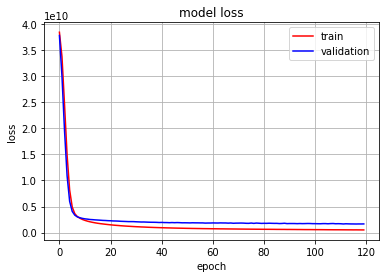

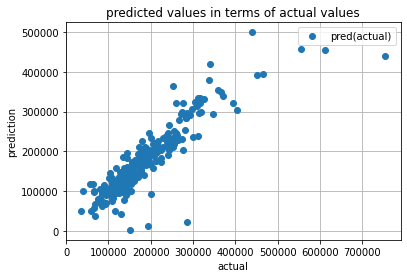

In [44]:
model = create_model('mean_squared_error', 0, 'relu', 0.03)
checkpoint = ModelCheckpoint('model_best_weights1rmse.h5', monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
history = model.fit(X_train, y_train, epochs=120, batch_size=16, validation_data = (X_test,y_test),
                    callbacks=[checkpoint])

plot_loss(history)
# load weights
model.load_weights("model_best_weights1rmse.h5")
# Compile model (required to make predictions)
opt = Adam(learning_rate=0.03)
model.compile(loss='mean_squared_error', optimizer=opt)
plot_pred_actual(model.predict(X_test), y_test)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                12288     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 16,513
Trainable params: 16,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
73/73 [==============================] - 0s 3ms/step - loss: 32340043637.6216 - val_loss: 4688882176.0000

Epoch 00001: val_loss improved from inf to 4688882176.00000, saving model to model_best_weights2rmse.h5
Epoch 2/120
73/73 [==============================] - 0s 2ms/step - loss: 4303743232.0000 - val_loss: 3304028416.0000

Epoch 00002: val_loss improved from 468

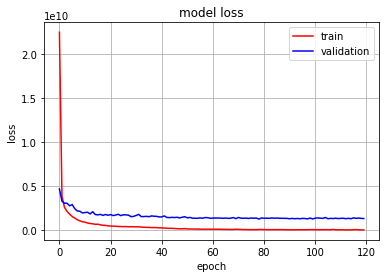

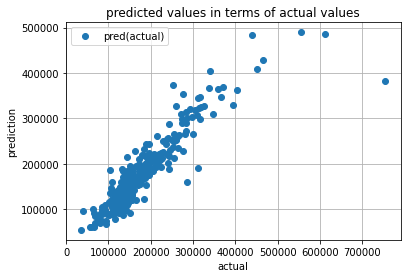

In [45]:
model = create_model('mean_squared_error', 1, 'relu', 0.03)
checkpoint = ModelCheckpoint('model_best_weights2rmse.h5', monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
history = model.fit(X_train, y_train, epochs=120, batch_size=16, validation_data = (X_test,y_test),
                    callbacks=[checkpoint])

plot_loss(history)
# load weights
model.load_weights("model_best_weights2rmse.h5")
# Compile model (required to make predictions)
opt = Adam(learning_rate=0.03)
model.compile(loss='mean_squared_error', optimizer=opt)
plot_pred_actual(model.predict(X_test), y_test)

Streaming output truncated to the last 5000 lines.
Epoch 1251/2500
73/73 [==============================] - 0s 3ms/step - loss: 20261056553.5135 - val_loss: 22898407424.0000

Epoch 01251: val_loss did not improve from 22814283776.00000
Epoch 1252/2500
73/73 [==============================] - 0s 3ms/step - loss: 20486578342.0541 - val_loss: 22896275456.0000

Epoch 01252: val_loss did not improve from 22814283776.00000
Epoch 1253/2500
73/73 [==============================] - 0s 3ms/step - loss: 18840454393.0811 - val_loss: 22890080256.0000

Epoch 01253: val_loss did not improve from 22814283776.00000
Epoch 1254/2500
73/73 [==============================] - 0s 3ms/step - loss: 20826351173.1892 - val_loss: 22888687616.0000

Epoch 01254: val_loss did not improve from 22814283776.00000
Epoch 1255/2500
73/73 [==============================] - 0s 3ms/step - loss: 20080634229.6216 - val_loss: 22887710720.0000

Epoch 01255: val_loss did not improve from 22814283776.00000
Epoch 1256/2500
73/73 [=

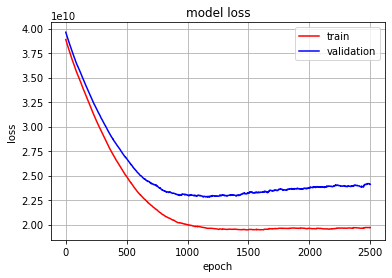

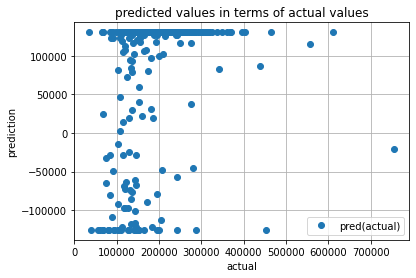

In [46]:
# model = create_model('mean_squared_error', 1, 'tanh')
# history = model.fit(X_train, y_train, epochs=2500, batch_size=16, validation_data = (X_test,y_test))

# plot_loss(history)
# plot_pred_actual(model.predict(X_test), y_test)

model = create_model('mean_squared_error', 0, 'tanh', 0.03)
checkpoint = ModelCheckpoint('model_best_weights1tmse.h5', monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
history = model.fit(X_train, y_train, epochs=2500, batch_size=16, validation_data = (X_test,y_test),
                    callbacks=[checkpoint])

plot_loss(history)
# load weights
model.load_weights("model_best_weights1tmse.h5")
# Compile model (required to make predictions)
opt = Adam(learning_rate=0.03)
model.compile(loss='mean_squared_error', optimizer=opt)
plot_pred_actual(model.predict(X_test), y_test)

Streaming output truncated to the last 5000 lines.
Epoch 2251/3500
73/73 [==============================] - 0s 3ms/step - loss: 1168476822.4865 - val_loss: 2708141312.0000

Epoch 02251: val_loss did not improve from 2674174976.00000
Epoch 2252/3500
73/73 [==============================] - 0s 3ms/step - loss: 1180101436.9730 - val_loss: 2695445504.0000

Epoch 02252: val_loss did not improve from 2674174976.00000
Epoch 2253/3500
73/73 [==============================] - 0s 3ms/step - loss: 1560124565.6216 - val_loss: 2705722880.0000

Epoch 02253: val_loss did not improve from 2674174976.00000
Epoch 2254/3500
73/73 [==============================] - 0s 3ms/step - loss: 1333408631.3514 - val_loss: 2664540160.0000

Epoch 02254: val_loss improved from 2674174976.00000 to 2664540160.00000, saving model to model_best_weights2tmse.h5
Epoch 2255/3500
73/73 [==============================] - 0s 3ms/step - loss: 1633060518.0541 - val_loss: 2680159488.0000

Epoch 02255: val_loss did not improve from

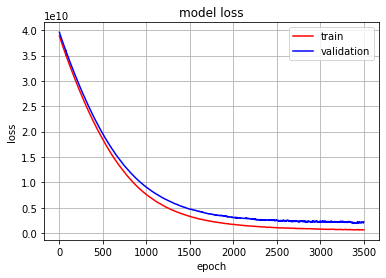

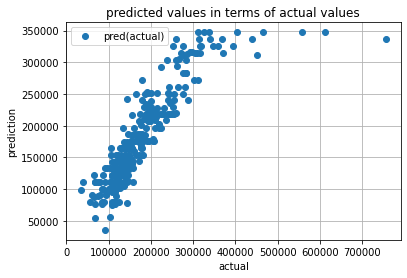

In [47]:
# model = create_model('mean_squared_error', 2, 'tanh')
# history = model.fit(X_train, y_train, epochs=2500, batch_size=16, validation_data = (X_test,y_test))

# plot_loss(history)
# plot_pred_actual(model.predict(X_test), y_test)
model = create_model('mean_squared_error', 1, 'tanh', 0.03)
checkpoint = ModelCheckpoint('model_best_weights2tmse.h5', monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
history = model.fit(X_train, y_train, epochs=3500, batch_size=16, validation_data = (X_test,y_test),
                    callbacks=[checkpoint])

plot_loss(history)
# load weights
model.load_weights("model_best_weights2tmse.h5")
# Compile model (required to make predictions)
opt = Adam(learning_rate=0.03)
model.compile(loss='mean_squared_error', optimizer=opt)
plot_pred_actual(model.predict(X_test), y_test)

#### compare MSE and MAE for The best architecture

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                12288     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 16,513
Trainable params: 16,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
73/73 [==============================] - 1s 5ms/step - loss: 34386180372.7568 - mse: 34386180372.7568 - mae: 165676.0768 - val_loss: 4308540928.0000 - val_mse: 4308540928.0000 - val_mae: 47353.7344

Epoch 00001: val_loss improved from inf to 4308540928.00000, saving model to model_best_weights2rmse.h5
Epoch 2/120
73/73 [==============================] - 0s 3ms/step 

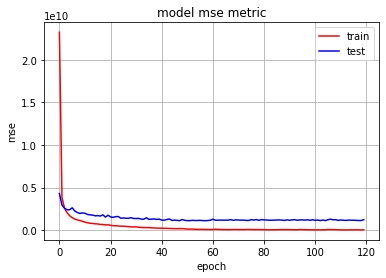

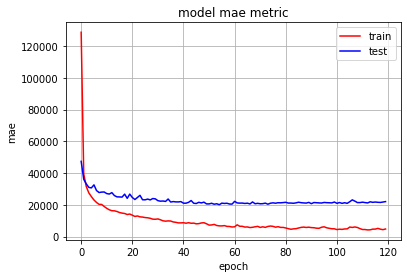

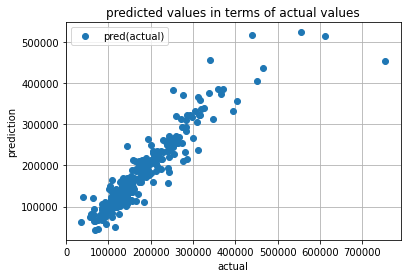

10/10 [==============================] - 0s 2ms/step - loss: 1029607770.1818


1121563520.0

In [86]:
# model = create_model('mean_squared_error', 2, 'relu')
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test),
#                     callbacks=[es])

# plot_loss(history)
# plot_pred_actual(model.predict(X_test), y_test)
import time

model = create_model('mean_squared_error', 1, 'relu', 0.03)
checkpoint = ModelCheckpoint('model_best_weights2rmse.h5', monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
s = time.time()
history = model.fit(X_train, y_train, epochs=120, batch_size=16, validation_data = (X_test,y_test),
                    callbacks=[checkpoint])
print('fit time:', time.time()-s)
plot_loss(history)
# load weights
model.load_weights("model_best_weights2rmse.h5")
# Compile model (required to make predictions)
opt = Adam(learning_rate=0.03)
model.compile(loss='mean_squared_error', optimizer=opt)
plot_pred_actual(model.predict(X_test), y_test)
model.evaluate(X_test, y_test)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                12288     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 16,513
Trainable params: 16,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
73/73 [==============================] - 1s 5ms/step - loss: 163529.4454 - mse: 33155200498.1622 - mae: 163529.4454 - val_loss: 46750.3945 - val_mse: 4978978816.0000 - val_mae: 46750.3945

Epoch 00001: val_loss improved from inf to 46750.39453, saving model to model_best_weights2rmse.h5
Epoch 2/120
73/73 [==============================] - 0s 3ms/step - loss: 42036.2

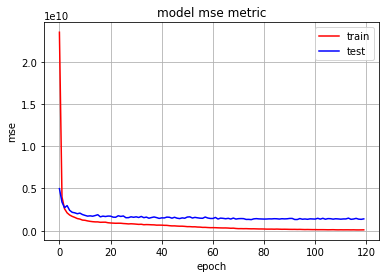

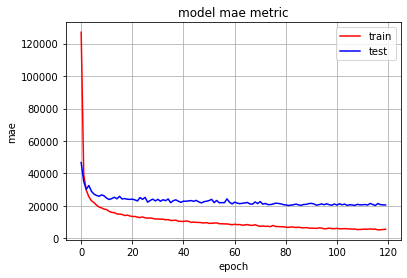

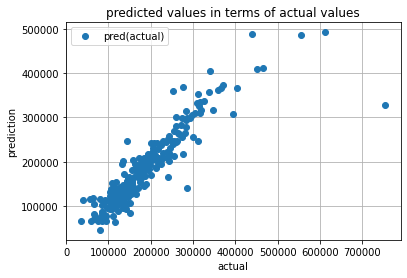

In [87]:
# model = create_model('mean_absolute_error', 2, 'relu')
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test),
#                     callbacks=[es])

# plot_loss(history)
# plot_pred_actual(model.predict(X_test), y_test)

model = create_model('mean_absolute_error', 1, 'relu', 0.03)
checkpoint = ModelCheckpoint('model_best_weights2rmse.h5', monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
history = model.fit(X_train, y_train, epochs=120, batch_size=16, validation_data = (X_test,y_test),
                    callbacks=[checkpoint])

plot_loss(history)
# load weights
model.load_weights("model_best_weights2rmse.h5")
# Compile model (required to make predictions)
opt = Adam(learning_rate=0.03)
model.compile(loss='mean_squared_error', optimizer=opt)
plot_pred_actual(model.predict(X_test), y_test)